In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [3]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),
                         (0.5,0.5,0.5))
])

In [4]:
trainset = torchvision.datasets.CIFAR10(
    root = './data',
    train=True,
    download=True,
    transform=transforms
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transforms
)

100%|██████████| 170M/170M [14:49<00:00, 192kB/s]     


In [5]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=32,shuffle=True)
testloader = torch.utils.data.DataLoader(testset,batch_size=32,shuffle=True)

In [6]:
images,labels= next(iter(trainloader))
print(images.shape)

torch.Size([32, 3, 32, 32])


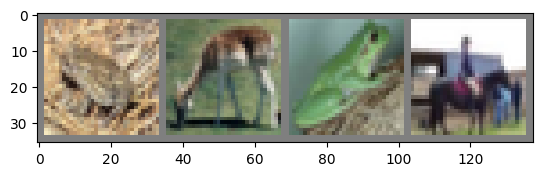

<generator object <genexpr> at 0x00000155DB370190>


In [7]:
classes = trainset.classes
def imshow(img):
    img = img /2+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
imshow(torchvision.utils.make_grid(images[:4]))
print([classes[labels[j]]]for j in range(4))
